# COLÁGENO E INSULINA, TOMA PROTEINA
## PLEGAMIENTO DE PROTEÍNAS 2D

### Realizado por: Fernando Andrés Galindo y Francisco Murillo Prior

#### Objetivos
• Comprender la teoría básica detrás del plegamiento de proteínas y la `paradoja de Levinthal`. Comparar estos conceptos con un problema de optimización.

• Identificar las distintas disciplinas necesarias para estudiar la paradoja de Levinthal. Entender la importancia de la `multidisciplinariedad`.

• Aprender a implementar un algoritmo en base a un modelo de plegamiento de proteínas 2D.

• Realizar gráficos con pyplot para representar los plegamientos de proteínas 2D.

• Aprender a usar la base de datos de proteínas `UNIPROT`.

• Documentar el trabajo realizado usando un formato de artículo científico. 

• Realizar una presentación de los resultados obtenidos. 

Diccionario con los `20 aminoacidos` y sus correspondientes valores de la variación de `Energía libre`:

In [1]:
Paa_deltaG = { 
'A': 1, # Alanine
'C': 0.17, # Cysteine
'D': -3, # Aspartic Acid
'E': -2.6, # Glutamic Acid
'F': 2.5, # Phenylalanine
'G': 0.67, # Glycine
'H': -1.7, # Histidine
'I': 3.1, # Isoleucine
'K': -4.6, # Lysine
'L': 2.2, # Leucine
'M': 1.1, # Methionine
'N': -2.7, # Asparagine
'P': -0.29,# Proline
'Q': -2.9, # Glutamine
'R': -7.5, # Arginine
'S': -1.1, # Serine
'T': -0.75,# Threonine
'V': 2.3, # Valine
'W': 1.5, # Tryptophan
'Y': 0.08 # Tyrosine
 }
 
print(Paa_deltaG)

{'A': 1, 'C': 0.17, 'D': -3, 'E': -2.6, 'F': 2.5, 'G': 0.67, 'H': -1.7, 'I': 3.1, 'K': -4.6, 'L': 2.2, 'M': 1.1, 'N': -2.7, 'P': -0.29, 'Q': -2.9, 'R': -7.5, 'S': -1.1, 'T': -0.75, 'V': 2.3, 'W': 1.5, 'Y': 0.08}


Clasificación de aminoácidos si son hidrofílicos (Energía libre < -1.5) o hidrofóbicos (Energía libre > -1.5)

Proteinas sencillas seleccionadas: `insulina, colágeno y albúmina`

### Ejercicio 1: Función Get Spatial Dic

Se pide implementar una función `get_spatial_dic(protein, structure)` que recibe una cadena 
representando una proteína (letras de aminoácidos) y otra cadena representando su estructura 
(I para el aminoácido inicial, N, S, E o W según la posición relativa de un aminoácido con respecto 
al anterior) y devuelve un diccionario o un diccionario vacío si existen solapamientos. Las claves 
de dicho diccionario serán tuplas de dos números enteros representando `coordenadas`
espaciales y los valores serán letras de aminoácidos.

In [2]:
def get_spatial_dic(protein, structure): #AHURGBXZ #INWESNEW
    res = {}
    if len(protein) != len(structure):
        return "ERROR: The size of the protein and structure must be the same"
    coordenadas = [0,0]
    res[tuple(coordenadas)] = protein[0]
    protein = list(protein)
    structure = list(structure)
    data = zip(protein,structure)
    for i in data:
        if i[1] == 'N':
            coordenadas[1] += 1
            if res.keys().__contains__(tuple(coordenadas)):
                return {}
            res[tuple(coordenadas)] = i[0]
        elif i[1] == 'S':
            coordenadas[1] -= 1
            if res.keys().__contains__(tuple(coordenadas)):
                return {}
            res[tuple(coordenadas)] = i[0]
        elif i[1] == 'E':
            coordenadas[0] += 1
            if res.keys().__contains__(tuple(coordenadas)):
                return {}
            res[tuple(coordenadas)] = i[0]
        elif i[1] == 'W':
            coordenadas[0] -= 1
            if res.keys().__contains__(tuple(coordenadas)):
                return {}
            res[tuple(coordenadas)] = i[0]
    return res

In [3]:
protein = get_spatial_dic("PEPTIDE", "IEENNWS")
protein

{(0, 0): 'P',
 (1, 0): 'E',
 (2, 0): 'P',
 (2, 1): 'T',
 (2, 2): 'I',
 (1, 2): 'D',
 (1, 1): 'E'}

### Ejercicio 2

Se pide implementar una función is_hydrophobic(aa

In [4]:
def is_hydrofobic(aa):
    res = False
    for aminoacido, energia in Paa_deltaG.items():
        if aminoacido == aa:
            res = energia > -1.5
    return res

In [5]:
is_hydrofobic('S')

True

Se pide implementar una función `get_score(dic)` que reciba un diccionario representando la estructura espacial de una proteína y devuelva su puntuación. La puntuación de un aminoácido será ΔG * N (si el aminoácido no es hidrofóbico) y ΔG * N + 10 * N (si el aminoácido es hidrofóbico). Siendo N el número de posiciones adyacentes libres.

Creamos una función auxiliar `get_adyacent_position` que nos calcula el valor de N, es decir las posiciones adyacentes libres de cada uno de los aminoácidos.

In [104]:
def get_adyacent_positions(coordenada,dic):
    coordenadasBase = []
    for i in dic.keys():
        coordenadasBase.append(i)
    n = 4
    coordenadaN = (coordenada[0],coordenada[1]+1)
    coordenadaS = (coordenada[0],coordenada[1]-1)
    coordenadaE = (coordenada[0]+1,coordenada[1])
    coordenadaW = (coordenada[0]-1,coordenada[1])
    coordenadasLibres = [coordenadaN, coordenadaS, coordenadaE, coordenadaW]
    for i in coordenadasLibres:
        if i in coordenadasBase:
            n -= 1
    return n

In [105]:
def get_score(protein):
    res = 0.0
    for clave, valor in protein.items():
        if is_hydrofobic(valor):
            res += Paa_deltaG.get(valor) * get_adyacent_positions(clave,protein) + 10 * get_adyacent_positions(clave,protein)
        else:
            res += Paa_deltaG.get(valor) * get_adyacent_positions(clave,protein)
    return res

get_score(get_spatial_dic('PEPTIDE','IEENNWS'))

72.80000000000001

### Ejercicio 3

Se pide implementar una función fold(structure, pos, angle) que recibe una estructura, una 
posición de plegado (desde donde se comienza a plegar) y el ángulo que puede ser 90 o –90

In [8]:
def fold(structure, pos, angle):
    newStructure = structure[:pos]
    for i in structure[pos:]:
        if angle == 90:
            if i == 'N':
                newStructure += 'W'
            elif i == 'S':
                newStructure += 'E'
            elif i == 'E':
                newStructure += 'N'
            elif i == 'W':
                newStructure += 'S'
        else:
            if i == 'N':
                newStructure += 'E'
            elif i == 'S':
                newStructure += 'W'
            elif i == 'E':
                newStructure += 'S'
            elif i== 'W':
                newStructure += 'N'
    return newStructure

fold('IEEEEEE',4,-90)

'IEEESSS'

Se pide implementar una función `get_successors(protein,structure)` que, dada una proteína y su estructura, devuelva un diccionario cuyas claves son todas las posibles estructuras válidas tras aplicar todos los posibles plegamientos y cuyos valores sean los correspondientes diccionarios espaciales obtenidos con `get_spatial_dic`. 

In [106]:
def get_successors(protein, structure):
    res = {}
    i = 1
    while i < len(protein):
        if(len(get_spatial_dic(protein,fold(structure,i,-90))) != 0):
            res[fold(structure,i,-90)] = get_spatial_dic(protein,fold(structure,i,-90))
        if(len(get_spatial_dic(protein,fold(structure,i,90))) != 0):
            res[fold(structure,i,90)] = get_spatial_dic(protein,fold(structure,i,90))
        i += 1
    return res
import random
get_successors('PEPTIDE','IEENWWN')

{'ISSENNE': {(0, 0): 'P',
  (0, -1): 'E',
  (0, -2): 'P',
  (1, -2): 'T',
  (1, -1): 'I',
  (1, 0): 'D',
  (2, 0): 'E'},
 'INNWSSW': {(0, 0): 'P',
  (0, 1): 'E',
  (0, 2): 'P',
  (-1, 2): 'T',
  (-1, 1): 'I',
  (-1, 0): 'D',
  (-2, 0): 'E'},
 'IESENNE': {(0, 0): 'P',
  (1, 0): 'E',
  (1, -1): 'P',
  (2, -1): 'T',
  (2, 0): 'I',
  (2, 1): 'D',
  (3, 1): 'E'},
 'IEEENNE': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (3, 0): 'T',
  (3, 1): 'I',
  (3, 2): 'D',
  (4, 2): 'E'},
 'IEENNNE': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (2, 1): 'T',
  (2, 2): 'I',
  (2, 3): 'D',
  (3, 3): 'E'},
 'IEENWNE': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (2, 1): 'T',
  (1, 1): 'I',
  (1, 2): 'D',
  (2, 2): 'E'},
 'IEENWWW': {(0, 0): 'P',
  (1, 0): 'E',
  (2, 0): 'P',
  (2, 1): 'T',
  (1, 1): 'I',
  (0, 1): 'D',
  (-1, 1): 'E'}}

### Ejercicio 4 

Usando las funciones creadas en los problemas anteriores, implementa el algoritmo de `Enfriamiento Simulado (Simmulating Annealing)` para resolver el problema del plegado 2D como un problema de optimización.

In [334]:
import random
import math

#Los parámetros de entrada son la cadena de la proteína, la temperratura inicial y el parámetro alpha que será
#de cuánto en cuánto irá disminuyendo la temperatura en cada iteración.
def simulated_annealing(protein,temp_init,alpha_parameter): 
    
    initial_temp = temp_init
    final_temp = 0
    alpha = alpha_parameter

    current_temp = initial_temp

    current_structure = generate_initial_structure(protein)
    solution = current_structure

    while current_temp > final_temp:
        lista = []
        for c,v in get_successors(protein, current_structure).items():
            lista.append(v)
        nxt = random.choice(lista) #Siguiente vecino aleatorio obtenido de los sucesores
        neighbor = get_sequence_from_structure(nxt)
        
        diff = get_score(get_spatial_dic(protein,current_structure)) - get_score(get_spatial_dic(protein,neighbor))

        if diff > 0: #Si la diferencia es negativa, significa que es mejor por tanto nos quedamos con ese
            solution = neighbor
            current_structure = neighbor
        else:
            if random.uniform(0.0, 1.0) < math.exp(diff / current_temp): #Aunque el siguiente es peor no hay porqué descartarlo
                solution = neighbor
                current_structure = neighbor
        current_temp -= alpha

    return solution

### Ejercicio 5
    

Se pide hacer una representación gráfica de las estructuras 2D resultante con pyplot. Coloreando 
de distinto color los aminoácidos dependiendo de si son hidrofóbicos o no

In [379]:
import matplotlib.pyplot as plt
def show_protein(protein, structure, markersize, sizeX, sizeY):
    diccionario = get_spatial_dic(protein, structure)
    puntos = []
    hidrofobicos = []
    for clave,valor in diccionario.items():
        puntos.append(clave)
        if is_hydrofobic(valor):
            hidrofobicos.append(clave)
    coordenadasX = []
    coordenadasY = []
    for p in puntos:
        coordenadasX.append(p[0])
        coordenadasY.append(p[1])
    hidrofobicosX = []
    hidrofobicosY = []
    for h in hidrofobicos:
        hidrofobicosX.append(h[0])
        hidrofobicosY.append(h[1])
    plt.plot(coordenadasX, coordenadasY, 'black', linewidth = 2)
    plt.plot(coordenadasX, coordenadasY, 'bp', marker=".", markersize=markersize)
    plt.plot(hidrofobicosX, hidrofobicosY, 'gp', marker=".", markersize=markersize)
    plt.grid()
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('ESTRUCTURA DE PLEGADO ELEGIDA')
    plt.xticks(range(min(coordenadasX),max(coordenadasX)+1))
    plt.yticks(range(min(coordenadasY),max(coordenadasY)+1))
    plt.rcParams["figure.figsize"] = (sizeX, sizeY)

### Generar estructura aleatoria
Definimos una función que dada una proteína nos obtenga una estructura inicial válida para empezar desde esa base a iterar y conseguir la que tenga menor energía libre. En nuestro caso será una línea recta hacia el este.

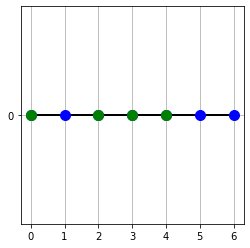

In [308]:
import random
def generate_initial_structure(protein):
    i = 1
    estructura = 'I'
    while i < len(protein):
        estructura += 'E'
        i += 1
    return estructura

struct = generate_initial_structure('PEPTIDE')
show_protein('PEPTIDE',struct,20,2,2)

Las siguientes funciones sirven para las diferetnes representaciones.
La primera `show_structure` recibe como parametro un sucesor de una proteína, mientras que `show_sucesores` recibe como parametro toda la lista de sucesores y utiliza la función anterior para mostrar cada uno de ellos

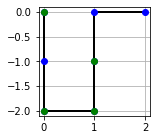

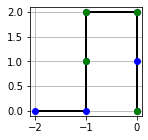

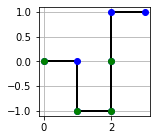

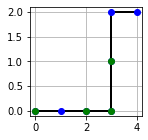

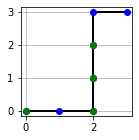

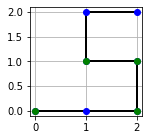

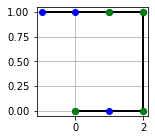

<Figure size 144x144 with 0 Axes>

In [309]:
import matplotlib.pyplot as plt
def show_structure(sucessor):
    coordenadasX = []
    coordenadasY = []
    hidrofobicosX = []
    hidrofobicosY = []
    for coordenada, aminoacido in sucessor[1].items():
        coordenadasX.append(coordenada[0])
        coordenadasY.append(coordenada[1])
        if(is_hydrofobic(aminoacido)):
            hidrofobicosX.append(coordenada[0])
            hidrofobicosY.append(coordenada[1])
    plt.plot(coordenadasX, coordenadasY, 'black', linewidth = 2)
    plt.plot(coordenadasX, coordenadasY, 'bp', marker=".", markersize=12)
    plt.plot(hidrofobicosX, hidrofobicosY, 'gp', marker=".", markersize=12)
    plt.grid()

def show_sucesores(sucesores):
    for sucesor in sucesores.items():
        plt.figure(show_structure(sucesor))

show_sucesores(get_successors('PEPTIDE', 'IEENWWN'))

La función auxiliar `get_sequence_from_structure` obtiene la cadena de direcciones de una proteina dada la estructura como diccionario espacial.

Ej: Entrada {(0,0):'P',(0,1):'E',(1,1):'P',(1,2):'T'}

Salida: 'IENE'

In [310]:
def get_sequence_from_structure(structure):
    res = 'I'
    coordenadas = [c for c,v in structure.items()]
    i = 1
    inicial = (0,0)
    for xy in coordenadas[1:]:
        if(xy[0]-inicial[0] == 1):
            res += 'E'
            inicial = xy
        elif(xy[0]-inicial[0] == -1):
            res += 'W'
            inicial = xy
        elif(xy[1]-inicial[1] == 1):
            res += 'N'
            inicial = xy
        elif(xy[1]-inicial[1] == -1):
            res += 'S'
            inicial = xy
    return res
    
get_sequence_from_structure(get_spatial_dic('PEPTIDE','IEEEEEE'))

'IEEEEEE'

Función auxiliar para obtener la cadena de aminoácidos a partir del diccionario espacial

In [311]:
def get_protein_name(structure):
    proteina = ''
    for clave,valor in structure.items():
        proteina += valor
    return proteina

A continuación para cada uno de las proteiínas simples elegidas y obtenidas de la base de datos UNIPROT vamos a inicializar sus estructuras a una línea recta, es decir todas las coordenadas 'E' y vamos a obtener los sucesores de cada una de ellas y representarlos.

# Insulina

PUNTUACION: 500.1299999999999


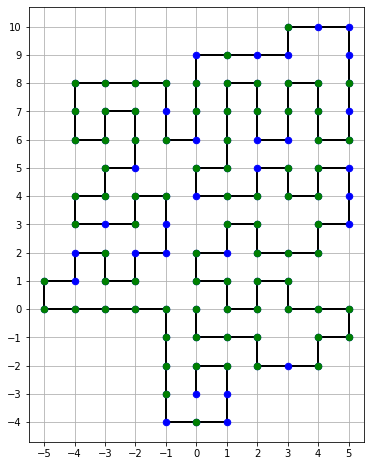

In [351]:
insulina = 'MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN'
sol = simulated_annealing(insulina,120,0.01)
print('PUNTUACION: '+str(get_score(get_spatial_dic(insulina,sol))))
show_protein(insulina, sol,13,6,8)


In [387]:
get_score(get_spatial_dic(glycophorin,generate_initial_structure(glycophorin)))

1619.3600000000004

# Colágeno

PUNTUACION: 233.16000000000003


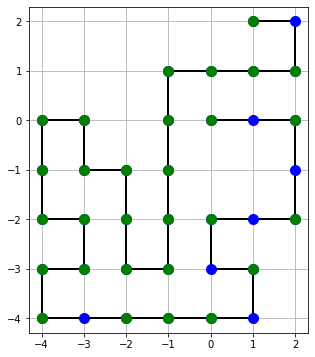

In [360]:
colageno = 'MDVHTRWKARSALRPGAPLLPPLLLLLLWAPPPSRA'
sol = simulated_annealing(colageno,100,0.01)
print('PUNTUACION: '+str(get_score(get_spatial_dic(colageno,sol))))
show_protein(colageno, sol,20,5,6)

# Glycophorin-B

PUNTUACION: 517.48


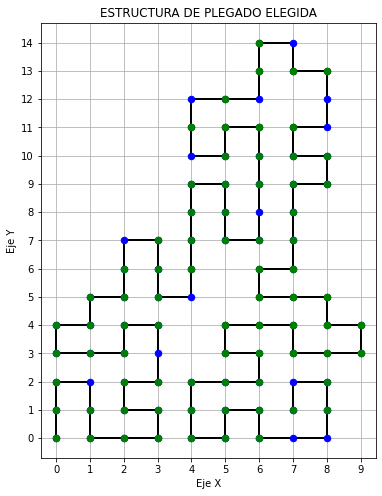

In [381]:
glycophorin = 'MYGKIIFVLLLSEIVSISALSTTEVAMHTSTSSSVTKSYISSQTNGETGQLVHRFTVPAPVVIILIILCVMAGIIGTILLISYSIRRLIKA'
sol = simulated_annealing(glycophorin,100,0.01)
print('PUNTUACION: '+str(get_score(get_spatial_dic(glycophorin,sol))))
show_protein(glycophorin, sol,13,6,8)

# Elastina

PUNTUACION: 388.16999999999996


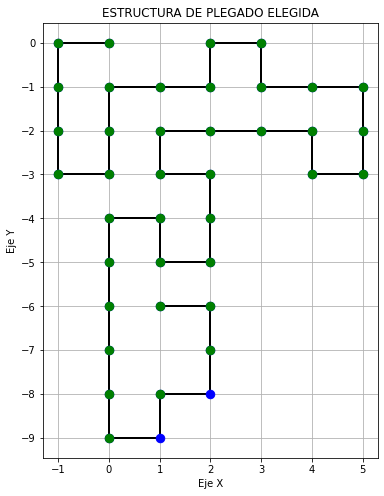

In [380]:
elastina = 'ATSLTLLTVAAGGLLSAPVGLGIAGLALVPIIIARTRVPA'
sol = simulated_annealing(elastina,100,0.01)
print('PUNTUACION: '+str(get_score(get_spatial_dic(elastina,sol))))
show_protein(elastina, sol,17,6,8)